# Mod 3 Final Project

## Questions

- 

## Student Info

- Name: 
- Cohort: 
- Instructor:


## Instructions:

- Open and read the project assignment and guidelines in `MOD_PROJECT_README.ipynb`
- Review the hypothesis testing workflow found in this repo's `README.md` and at the bottom of the `MOD_PROJECT_README.ipynb`
- 3 functions from study group/learn.co lessons have been provided inside `functions.py`
    - `Cohen_d`, `find_outliers_IQR`,`find_outliers_Z`

<img src="https://raw.githubusercontent.com/jirvingphd/dsc-mod-3-project-online-ds-ft-100719/master/Northwind_ERD_updated.png">

# PROJECT

In [1]:
!pip install -U fsds_100719
from fsds_100719.imports import *

import pandas as pd


fsds_1007219  v0.7.4 loaded.  Read the docs: https://fsds.readthedocs.io/en/latest/ 


Handle,Package,Description
dp,IPython.display,Display modules with helpful display and clearing commands.
fs,fsds_100719,Custom data science bootcamp student package
mpl,matplotlib,Matplotlib's base OOP module with formatting artists
plt,matplotlib.pyplot,Matplotlib's matlab-like plotting module
np,numpy,scientific computing with Python
pd,pandas,High performance data structures and tools
sns,seaborn,High-level data visualization library based on matplotlib


['[i] Pandas .iplot() method activated.']


In [2]:
from functions import Cohen_d, find_outliers_IQR,find_outliers_Z

## Uncomment the line below to see the source code for the imported functions
# fs.ihelp(Cohen_d,False),fs.ihelp(find_outliers_IQR,False), fs.ihelp(find_outliers_Z,False)

In [3]:
import sqlite3
connect = sqlite3.connect('Northwind_small.sqlite')
cur = connect.cursor()

In [4]:
cur.execute("""SELECT name FROM sqlite_master WHERE type='table';""")
df_tables = pd.DataFrame(cur.fetchall(), columns=['Table'])
df_tables

,Table
0,Employee
1,Category
2,Customer
3,Shipper
4,Supplier
5,Order
6,Product
7,OrderDetail
8,CustomerCustomerDemo
9,CustomerDemographic


# NOTES RE CHOOSING HYPOTHESES

- 

# HYPOTHESIS 2

> ***Does discount amount have a statistically significant effect on the total spent ($) on a product in an order? If so, at what level(s) of discount?***

- $H_0$: Customers spend the same total amounts on both discounted and non-discounted products. 

- $H_1$: Customers spend different total amounts of money on discounted products vs full price products. 

In [6]:
cur.execute("""SELECT * from OrderDetail""")
cur.description

(('Id', None, None, None, None, None, None),
 ('OrderId', None, None, None, None, None, None),
 ('ProductId', None, None, None, None, None, None),
 ('UnitPrice', None, None, None, None, None, None),
 ('Quantity', None, None, None, None, None, None),
 ('Discount', None, None, None, None, None, None))

In [8]:
col_names=[x[0] for x in cur.description]
col_names

['Id', 'OrderId', 'ProductId', 'UnitPrice', 'Quantity', 'Discount']

In [9]:
df = pd.DataFrame(cur.fetchall(), columns=col_names)
df

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
0,10248/11,10248,11,14.00,12,0.00
1,10248/42,10248,42,9.80,10,0.00
2,10248/72,10248,72,34.80,5,0.00
3,10249/14,10249,14,18.60,9,0.00
4,10249/51,10249,51,42.40,40,0.00
...,...,...,...,...,...,...
2150,11077/64,11077,64,33.25,2,0.03
2151,11077/66,11077,66,17.00,1,0.00
2152,11077/73,11077,73,15.00,2,0.01
2153,11077/75,11077,75,7.75,4,0.00


In [61]:
df['groups'] = df['Discount'] >0 

df['groups'] = df['groups'].map({True:'Discounted', False:'Full Price'})
df['group_num'] = df['groups'].map({'Discounted':1,'Full Price': 0})

df

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount,groups,Total Spent,group_num
0,10248/11,10248,11,14.00,12,0.00,Full Price,168.0,0
1,10248/42,10248,42,9.80,10,0.00,Full Price,98.0,0
2,10248/72,10248,72,34.80,5,0.00,Full Price,174.0,0
3,10249/14,10249,14,18.60,9,0.00,Full Price,167.4,0
4,10249/51,10249,51,42.40,40,0.00,Full Price,1696.0,0
...,...,...,...,...,...,...,...,...,...
2150,11077/64,11077,64,33.25,2,0.03,Discounted,66.5,1
2151,11077/66,11077,66,17.00,1,0.00,Full Price,17.0,0
2152,11077/73,11077,73,15.00,2,0.01,Discounted,30.0,1
2153,11077/75,11077,75,7.75,4,0.00,Full Price,31.0,0


In [62]:
## create total spent
df["Total Spent"] = df['UnitPrice'] * df['Quantity']
df

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount,groups,Total Spent,group_num
0,10248/11,10248,11,14.00,12,0.00,Full Price,168.0,0
1,10248/42,10248,42,9.80,10,0.00,Full Price,98.0,0
2,10248/72,10248,72,34.80,5,0.00,Full Price,174.0,0
3,10249/14,10249,14,18.60,9,0.00,Full Price,167.4,0
4,10249/51,10249,51,42.40,40,0.00,Full Price,1696.0,0
...,...,...,...,...,...,...,...,...,...
2150,11077/64,11077,64,33.25,2,0.03,Discounted,66.5,1
2151,11077/66,11077,66,17.00,1,0.00,Full Price,17.0,0
2152,11077/73,11077,73,15.00,2,0.01,Discounted,30.0,1
2153,11077/75,11077,75,7.75,4,0.00,Full Price,31.0,0


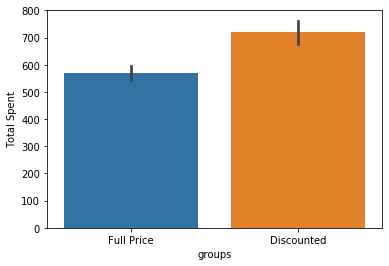

In [63]:
sns.barplot(data=df, x='groups', y='Total Spent', ci=68 )

In [64]:
grps = {}
for grp_name in df['groups'].unique():
    grps[grp_name] = df.groupby('groups').get_group(grp_name)['Total Spent']
grps

{'Full Price': 0        168.0
 1         98.0
 2        174.0
 3        167.4
 4       1696.0
          ...  
 2147      14.0
 2148      48.0
 2151      17.0
 2153      31.0
 2154      26.0
 Name: Total Spent, Length: 1317, dtype: float64, 'Discounted': 6       1484.0
 7        252.0
 8        100.8
 9        234.0
 11      2592.0
          ...  
 2144      36.0
 2146      36.0
 2149      68.0
 2150      66.5
 2152      30.0
 Name: Total Spent, Length: 838, dtype: float64}

In [65]:
fs.ihelp(find_outliers_Z,False)

------------------------------------------------------------------------------------
------ SOURCE ----------------------------------------------------------------------


```python
def find_outliers_Z(data):
    """Use scipy to calculate absolute Z-scores 
    and return boolean series where True indicates it is an outlier.

    Args:
        data (Series,or ndarray): data to test for outliers.

    Returns:
        [boolean Series]: A True/False for each row use to slice outliers.
        
    EXAMPLE USE: 
    >> idx_outs = find_outliers_df(df['AdjustedCompensation'])
    >> good_data = df[~idx_outs].copy()
    """
    import pandas as pd
    import numpy as np
    import scipy.stats as stats
    ## Calculate z-scores
    zs = stats.zscore(data)
    
    ## Find z-scores >3 awayfrom mean
    idx_outs = np.abs(zs)>3
    
    ## If input was a series, make idx_outs index match
    if isinstance(data,pd.Series):
        return pd.Series(idx_outs,index=data.index)
    else:
        return pd.Series(idx_outs)

```

[Text(0, 0.5, 'Density'), Text(0.5, 1.0, 'Total Spent by Discounted Gropup')]

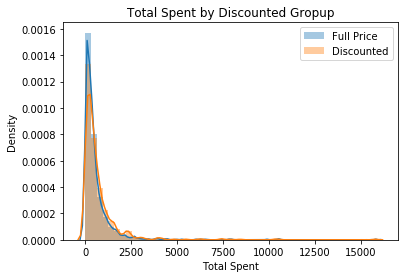

In [66]:
##Outlier Removal
for grp_name,grp_data in grps.items():
    sns.distplot(grp_data,label=grp_name)
    
    
ax= plt.gca()
ax.legend()
ax.set(title='Total Spent by Discounted Gropup', ylabel='Density')

[Text(0, 0.5, 'Density'),
 Text(0.5, 1.0, 'Total Spent for Full Price vs Discounted Products')]

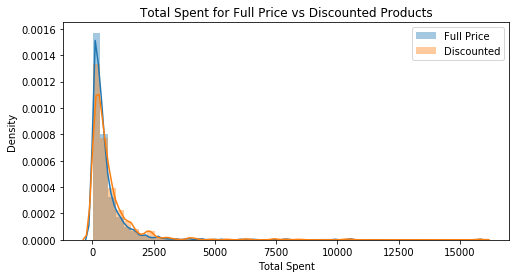

In [67]:
##Outlier Removal
fig,ax=plt.subplots(figsize=(8,4))
for grp_name,grp_data in grps.items():
    sns.distplot(grp_data,label=grp_name, ax=ax)
    
    
ax.legend()
ax.set(title='Total Spent for Full Price vs Discounted Products', ylabel='Density')

In [68]:
idx_outs =find_outliers_Z(grps['Full Price'])
grps['Full Price'][~idx_outs]

0        168.0
1         98.0
2        174.0
3        167.4
4       1696.0
         ...  
2147      14.0
2148      48.0
2151      17.0
2153      31.0
2154      26.0
Name: Total Spent, Length: 1298, dtype: float64

In [69]:
for grp_name, grp_data in grps.items():
    idx_outs =find_outliers_Z(grp_data)
    print(f"[i] Found {idx_outs.sum()} outliers in {grp_name} using Z-scores")
    
    idx_outs =find_outliers_IQR(grp_data)

    print(f"[i] Found {idx_outs.sum()} outliers in {grp_name} using IQR")
    print('\n')

[i] Found 19 outliers in Full Price using Z-scores
[i] Found 101 outliers in Full Price using IQR


[i] Found 13 outliers in Discounted using Z-scores
[i] Found 63 outliers in Discounted using IQR




In [70]:
for grp_name, grp_data in grps.items():
    idx_outs =find_outliers_Z(grp_data)
    print(f"[i] Found {idx_outs.sum()} outliers in {grp_name} using Z-scores")
    grps[grp_name] = grp_data[~idx_outs]
    

[i] Found 19 outliers in Full Price using Z-scores
[i] Found 13 outliers in Discounted using Z-scores


[Text(0, 0.5, 'Density'),
 Text(0.5, 1.0, 'Total Spent for Full Price vs Discounted Products')]

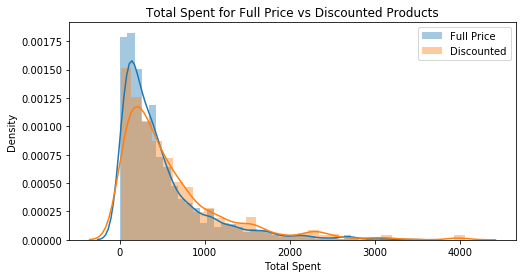

In [71]:
##Outlier Removal
fig,ax=plt.subplots(figsize=(8,4))
for grp_name,grp_data in grps.items():
    sns.distplot(grp_data,label=grp_name, ax=ax)
    
    
ax.legend()
ax.set(title='Total Spent for Full Price vs Discounted Products', ylabel='Density')

In [72]:
import scipy.stats as stats

In [73]:
for k,v in grps.items():
    stat,p = stats.normaltest(v)
    print(f"Group {k} Normaltest p-value = {round(p,4)}")
    sig = 'is NOT' if p<.05 else 'IS'
    print(f"\t-The data is {sig} normal.")

Group Full Price Normaltest p-value = 0.0
	-The data is is NOT normal.
Group Discounted Normaltest p-value = 0.0
	-The data is is NOT normal.


In [74]:
len(grps['Full Price']), len(grps['Discounted'])

(1298, 825)

In [75]:
data = []
for k,v in grps.items():
    data.append(v)
data[0]

0        168.0
1         98.0
2        174.0
3        167.4
4       1696.0
         ...  
2147      14.0
2148      48.0
2151      17.0
2153      31.0
2154      26.0
Name: Total Spent, Length: 1298, dtype: float64

In [76]:
stats.levene(data[0],data[1])

LeveneResult(statistic=16.674064580142414, pvalue=4.603065710436535e-05)

In [77]:
stat, p = stats.levene(*data)
print(f"Levene' Test for Equal Variance p-value={round(p,4)}")
sig = 'do NOT' if p<.05 else 'DO'

print(f"\t- The groups {sig} have equal variance.")

Levene' Test for Equal Variance p-value=0.0
	- The groups do NOT have equal variance.


In [78]:
stat,p = stats.ttest_ind(grps['Full Price'], grps['Discounted'], equal_var=False)
print(f"Welch's t-test p value={round(p,4)}")


Welch's t-test p value=0.0


In [79]:
Cohen_d(grps['Full Price'],grps['Discounted'])

-0.22821293413002144

In [82]:
df.isna().sum()

Id             0
OrderId        0
ProductId      0
UnitPrice      0
Quantity       0
Discount       0
groups         0
Total Spent    0
group_num      0
dtype: int64

In [84]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
model = pairwise_tukeyhsd(df['Total Spent'],df['Discount'])
model.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
0.0,0.01,-540.0065,0.9,-3870.951,2790.9379,False
0.0,0.02,-539.5065,0.9,-2895.7333,1816.7202,False
0.0,0.03,-528.4565,0.9,-2453.0368,1396.1237,False
0.0,0.04,-489.0065,0.9,-3819.951,2841.9379,False
0.0,0.05,269.9216,0.0362,8.4896,531.3536,True
0.0,0.06,-502.0065,0.9,-3832.951,2828.9379,False
0.0,0.1,17.6565,0.9,-251.6084,286.9214,False
0.0,0.15,85.716,0.9,-195.4149,366.8469,False
0.0,0.2,122.3933,0.9,-155.5997,400.3864,False
0.0,0.25,286.6044,0.045,3.0375,570.1714,True


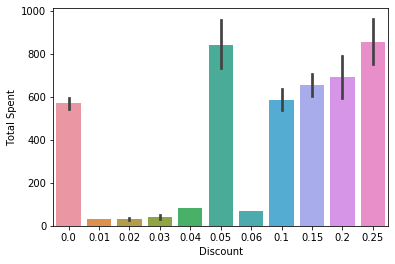

In [86]:
sns.barplot(data=df,x='Discount',y='Total Spent',ci=68)